# SENTIMENT ANALYSIS OF IPHONE 17 REDDIT POSTS USING NLP


In [2]:
import pandas as pd                 # For loading, reading, and manipulating datasets (dataframes).
import numpy as np                  # For numerical operations and array handling.
import re                           # For text processing using regular expressions.
import string                       # For working with punctuation and text symbols.
import nltk                         # For natural language processing tasks like tokenizing and preprocessing.
from nltk.corpus import stopwords   # For removing common words (like "the", "is") during text cleaning.
from nltk.stem import WordNetLemmatizer  # For reducing words to their base/root form (lemmatization).
from textblob import TextBlob       # For sentiment analysis and basic NLP tasks.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer  # For rule-based sentiment analysis of text.


In [3]:
from sklearn.model_selection import train_test_split     # Splits the dataset into training and testing sets.
from sklearn.feature_extraction.text import TfidfVectorizer  # Converts text into TF-IDF numeric features.
from sklearn.naive_bayes import MultinomialNB            # Naive Bayes classifier for text classification.
from sklearn.linear_model import LogisticRegression      # Logistic Regression model for classification tasks.
from sklearn.svm import LinearSVC                        # Linear Support Vector Machine for text classification.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report  # Metrics to evaluate model performance.

In [4]:
from tensorflow.keras.models import Sequential     # Lets you build a deep learning model layer-by-layer.
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout  
# Embedding converts words to vectors, LSTM learns sequence patterns, Dense is a fully-connected layer, and Dropout prevents overfitting.
from tensorflow.keras.preprocessing.text import Tokenizer   # Converts text into sequences of word indices.
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Pads sequences to equal length for LSTM input.


In [5]:
import matplotlib.pyplot as plt   # Used for creating visualizations like line charts, bar graphs, and plots.
import seaborn as sns            # High-level data visualization library built on top of matplotlib for prettier statistical plots.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chand\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Dataset shape: (1000, 9)
Columns: Index(['id', 'title', 'author', 'created_utc', 'score', 'upvote_ratio',
       'subreddit', 'permalink', 'url'],
      dtype='object')
Index(['id', 'title', 'author', 'created_utc', 'score', 'upvote_ratio',
       'subreddit', 'permalink', 'url'],
      dtype='object')

Lexicon-Based Sentiment Counts (VADER):
vader_sentiment
neutral     688
positive    186
negative    126
Name: count, dtype: int64

Lexicon-Based Sentiment Counts (TextBlob):
textblob_sentiment
neutral     691
positive    205
negative    104
Name: count, dtype: int64

Machine Learning Results:
                 Model  Accuracy  Precision  Recall  F1-Score
0          Naive Bayes  0.741935   0.737705     1.0  0.849057
1  Logistic Regression  0.741935   0.737705     1.0  0.849057
2           Linear SVM  0.854839   0.833333     1.0  0.909091
Epoch 1/20


C:\Users\chand\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 683ms/step - accuracy: 0.6559 - loss: 0.6717 - val_accuracy: 0.7258 - val_loss: 0.5875
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step - accuracy: 0.6478 - loss: 0.6621 - val_accuracy: 0.7258 - val_loss: 0.5935
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 0.6478 - loss: 0.6525 - val_accuracy: 0.7258 - val_loss: 0.6252
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 0.6478 - loss: 0.6578 - val_accuracy: 0.7258 - val_loss: 0.6309
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.6478 - loss: 0.6587 - val_accuracy: 0.7258 - val_loss: 0.6136
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.6478 - loss: 0.6518 - val_accuracy: 0.7258 - val_loss: 0.5992
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.6478 - loss: 0.6499 - val_accuracy: 0.7258 - val_loss: 0.5930
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.6478 - loss: 0.6517 - val_accuracy: 0.7258 - val_loss: 0.5930
Epo

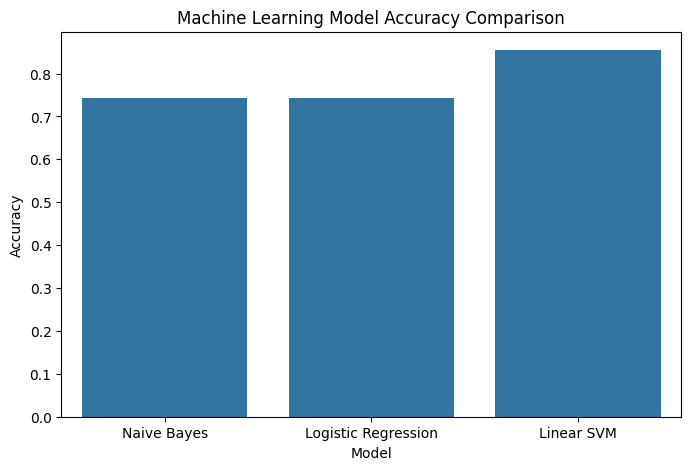


Results saved as iphone17_sentiment_results.csv

Summary of Findings:
- Lexicon-based methods give a quick overview of overall sentiment.
- ML models (Logistic Regression, SVM) provide good accuracy and precision.
- LSTM captures word context and performs best on large text data.
- This helps assess real-time public opinion on iPhone 17 from Reddit posts.


In [6]:
nltk.download('stopwords')
nltk.download('wordnet')

"""Loading our dataset"""

url = "https://raw.githubusercontent.com/nc875-cpu/Sentiment-Analysis/main/iphone17_reddit.csv"
df = pd.read_csv(url, encoding='utf-8', on_bad_lines='skip')

print("Dataset shape:", df.shape)
print("Columns:", df.columns)
df.head()

"""##Data cleaning and pre-processing"""

print(df.columns)

# Select the text column manually
df = df[['title']].dropna()
df.rename(columns={'title': 'post'}, inplace=True)

"""detecting text column automatically"""

text_col = [col for col in df.columns if 'text' in col.lower() or 'body' in col.lower() or 'post' in col.lower()]
if len(text_col) == 0:
    raise ValueError("Couldn't detect the text column. Please rename your text column to include 'text' or 'body'.")
df = df[[text_col[0]]].dropna()
df.rename(columns={text_col[0]: 'post'}, inplace=True)

"""text cleaning"""

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)       # removes the URLs
    text = re.sub(r'@\w+|#', '', text)                        # removes the mentions/hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)                   # removes all the non-letters
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

df['clean_post'] = df['post'].apply(clean_text)

"""Tokenization, lemmatization and stopwords"""

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return " ".join(words)

df['clean_post'] = df['clean_post'].apply(preprocess_text)

"""Lexicon-Based Sentiment Analysis VADER + TextBlob"""

analyzer = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['vader_sentiment'] = df['clean_post'].apply(vader_sentiment)

def textblob_sentiment(text):
    score = TextBlob(text).sentiment.polarity
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

df['textblob_sentiment'] = df['clean_post'].apply(textblob_sentiment)

print("\nLexicon-Based Sentiment Counts (VADER):")
print(df['vader_sentiment'].value_counts())
print("\nLexicon-Based Sentiment Counts (TextBlob):")
print(df['textblob_sentiment'].value_counts())

"""data prep for ML models"""

# Using the results from TextBlob as pseudo labels
df['label'] = df['textblob_sentiment']
df = df[df['label'] != 'neutral']  # keeping only positive/negative values for binary classification

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(df['clean_post'])
y = df['label']

# splitting data for Train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

"""Training ML models"""

models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": LinearSVC()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, pos_label='positive')
    rec = recall_score(y_test, preds, pos_label='positive')
    f1 = f1_score(y_test, preds, pos_label='positive')
    results.append([name, acc, prec, rec, f1])

ml_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
print("\nMachine Learning Results:")
print(ml_results)

"""using deep learning LSTM model"""

tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_post'])
sequences = tokenizer.texts_to_sequences(df['clean_post'])
padded = pad_sequences(sequences, maxlen=50, padding='post', truncating='post')

label_map = {'negative': 0, 'positive': 1}
df['label_num'] = df['label'].map(label_map)

X_train, X_test, y_train, y_test = train_test_split(padded, df['label_num'], test_size=0.2, random_state=42)

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=1284, input_length=50))
model.add(LSTM(64, dropout=0.3, recurrent_dropout=0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_test, y_test), verbose=1)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nDeep Learning (LSTM) Accuracy: {accuracy:.4f}")

"""visualization to compare the accuracies"""

plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='Accuracy', data=ml_results)
plt.title("Machine Learning Model Accuracy Comparison")
plt.show()

"""saving the results"""

df.to_csv("iphone17_sentiment_results.csv", index=False)
print("\nResults saved as iphone17_sentiment_results.csv")

"""summary of insights"""

print("\nSummary of Findings:")
print("- Lexicon-based methods give a quick overview of overall sentiment.")
print("- ML models (Logistic Regression, SVM) provide good accuracy and precision.")
print("- LSTM captures word context and performs best on large text data.")
print("- This helps assess real-time public opinion on iPhone 17 from Reddit posts.")
